In [420]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1: Data Cleaning 1

In [421]:
# File path of companies and rounds2 data

companyFilePath="C:/Assignments/InvestmentAssignments/Data/companies.csv"
roundsFilePath="C:/Assignments/InvestmentAssignments/Data/rounds2.csv"
mappingFilePath="C:/Assignments/InvestmentAssignments/Data/mapping.csv"


In [422]:
# Loading companies data into a dataframe
companies = pd.read_csv(companyFilePath, encoding="palmos",engine="python",sep=",")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [423]:
# Loading rounds2 data into a dataframe
rounds2 = pd.read_csv(roundsFilePath, encoding="palmos",engine="python",sep=",")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [424]:
# Sanity check  
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [425]:
# Sanity check  
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


- Total records in companies data = 66368
- Total records in rounds2 data = 114949
- There is not any null values present in both the company_permalink in rounds2 dataset and permalink in the companies dataset

In [426]:
# Different count details of companies in companies data
total_c = companies.permalink.count()
unique_c = companies.permalink.nunique()
unique_lower_c = companies.permalink.apply(lambda x: x.lower()).nunique()
print("In Companies data : permalink count ")
print("Total: ", total_c, ", Unique: ", unique_c,", Unique count(in Lower case of columns): ",unique_lower_c)

In Companies data : permalink count 
Total:  66368 , Unique:  66368 , Unique count(in Lower case of columns):  66368


In [427]:
# Different count details of companies in rounds2 data
total_r = rounds2.company_permalink.count()
unique_r = rounds2.company_permalink.nunique()
unique_lower_r = rounds2.company_permalink.apply(lambda x: x.lower()).nunique()

print("In rounds2 data : company_permalink count ")
print("Total: ", total_r, ", Unique: ", unique_r,", Unique count(in Lower case of columns): ",unique_lower_r)

In rounds2 data : company_permalink count 
Total:  114949 , Unique:  90247 , Unique count(in Lower case of columns):  66368


In [428]:
# Conversion into same letter case before applying join 
companies.permalink=companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink=rounds2.company_permalink.apply(lambda x: x.lower())

In [429]:
# Check - Unmatched companies while joining rounds2 and companies data
df = pd.merge(companies, rounds2, left_on=["permalink"], right_on=["company_permalink"], how="left")
df[df['company_permalink'].isna()].drop('company_permalink', axis=1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


i.e none of the unmatched companies is found while joining rounds2 and companies data

### Master Data frame creation

In [430]:
# Master frame creation - by joining rounds2 df and comapnies df 
master_frame = pd.merge(rounds2,companies, left_on=["company_permalink"], right_on=["permalink"], how="inner")
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [431]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [432]:
# Remove unnecessary column from the master frame
master_frame = master_frame.drop(axis=1, columns=["funding_round_permalink","funding_round_code","permalink", "homepage_url", "state_code","region", "city", "founded_at"])

In [433]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   funded_at           114949 non-null  object 
 3   raised_amount_usd   94959 non-null   float64
 4   name                114948 non-null  object 
 5   category_list       111539 non-null  object 
 6   status              114949 non-null  object 
 7   country_code        106271 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.9+ MB


In [434]:
master_frame.shape

(114949, 8)

# 2. Fund Analysis
- Here we are trying to find out most suitable fund type for the investment 

In [435]:
# Filter on funding type except four funding(venture, angel, seed, and private equity) 
master_frame = master_frame.loc[(master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='angel')|(master_frame['funding_round_type']=='seed') |(master_frame['funding_round_type']=='private_equity')]

In [436]:
master_frame.shape

(94397, 8)

<AxesSubplot:>

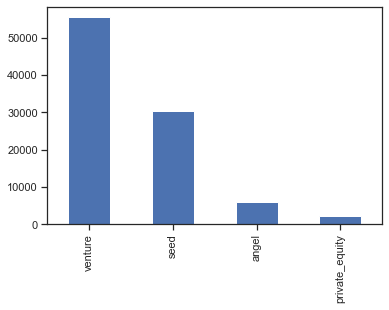

In [437]:
#Sanity check
master_frame.funding_round_type.value_counts().plot.bar(x="funding_round_type") 

In [438]:
#Data checks - null in raised amount
total_null = round(100*(master_frame.raised_amount_usd.isnull().sum()/master_frame.raised_amount_usd.count()),2)
print("Total % of Null count in raised_amount_usd : ", total_null,"%")

Total % of Null count in raised_amount_usd :  17.08 %


In [439]:
# % null count in investment amount all the funds
v_null=round(100*(master_frame[master_frame.funding_round_type=='venture'].raised_amount_usd.isnull().sum()/master_frame[master_frame.funding_round_type=='venture'].raised_amount_usd.count()),2)
a_null=round(100*(master_frame[master_frame.funding_round_type=='angel'].raised_amount_usd.isnull().sum()/master_frame[master_frame.funding_round_type=='angel'].raised_amount_usd.count()),2)
s_null=round(100*(master_frame[master_frame.funding_round_type=='seed'].raised_amount_usd.isnull().sum()/master_frame[master_frame.funding_round_type=='seed'].raised_amount_usd.count()),2)
p_null=round(100*(master_frame[master_frame.funding_round_type=='private_equity'].raised_amount_usd.isnull().sum()/master_frame[master_frame.funding_round_type=='private_equity'].raised_amount_usd.count()),2)
print("% of Null count in : ")
print("venture : ",v_null, "%", "\nangel : ", a_null,"%", "\nseed : ", s_null,"%", "\nprivate_equity : ", p_null,"%")

% of Null count in : 
venture :  10.48 % 
angel :  25.39 % 
seed :  29.32 % 
private_equity :  18.03 %


So, there are lots of null values present in the investment amount field, we should try to fill it by the representative value of investment amount fo the further analysis. Next, we will try to find out the representative value.

In [440]:
# To display the amount in proper format
pd.set_option('display.float_format', '{:.2f}'.format)

In [441]:
# Raised amount columns analysis
master_frame.raised_amount_usd.describe()

count         80627.00
mean        9347994.74
std        75629397.45
min               0.00
25%          400000.00
50%         2000000.00
75%         7975495.50
max     17600000000.00
Name: raised_amount_usd, dtype: float64

In [442]:
# With null - analyzing the all the inevstment amount across al the four funds
master_frame.groupby(["funding_round_type"]).describe()

raised_amount_usd                                           \
                               count        mean          std  min        25%   
funding_round_type                                                              
angel                        4860.00   958694.47   7404397.12 0.00  150000.00   
private_equity               1936.00 73308593.03 198113458.41 0.00 5000000.00   
seed                        23603.00   719818.00   2221732.80 0.00   55000.00   
venture                     50228.00 11748949.13  86352066.56 0.00 1600901.75   

                                                           
                           50%         75%            max  
funding_round_type                                         
angel                400000.00  1000000.00   494511992.00  
private_equity     20000000.00 75000000.00  4745460219.00  
seed                 275000.00  1000000.00   200000000.00  
venture             5000000.00 12000000.00 17600000000.00

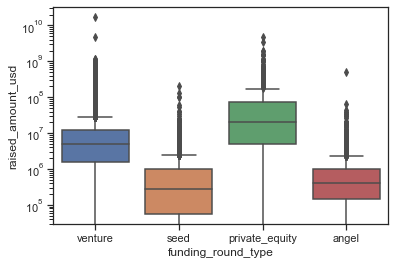

In [443]:
# Visualize the same using box plot - all the inevstment amount across al the four funds
sns.boxplot(x="funding_round_type",y="raised_amount_usd", data=master_frame)
plt.yscale("log")
plt.show()

##### Statistics of all four funds(Angel, Seed, Venture, Private equity)
- Mean : 9.3 million USD
- Median : 2 million USD
- Max : 17600 million USD

***It is affected by Outliers*** : We can choose **MEDIAN** as representative amount overall. For more clarification we can visulalize the below box plot.

In [444]:
# Representative value
median = master_frame.raised_amount_usd.median()
print("Median : ",median)

Median :  2000000.0


In [445]:
# Fill the median value in all null values of investment amt and see the result 
master_frame.raised_amount_usd = master_frame.raised_amount_usd.fillna(median)

In [446]:
# Sanity check
master_frame.raised_amount_usd.isnull().sum()

0

In [447]:
master_frame.shape

(94397, 8)

In [448]:
master_frame.raised_amount_usd.describe()

count         94397.00
mean        8276118.65
std        69943958.90
min               0.00
25%          530000.00
50%         2000000.00
75%         6000000.00
max     17600000000.00
Name: raised_amount_usd, dtype: float64

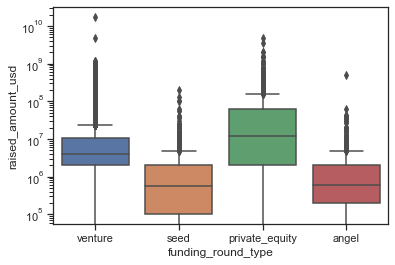

In [449]:
# Visualize the investment and amount using box plot - all the inevstment amount across al the four funds
sns.boxplot(x="funding_round_type",y="raised_amount_usd", data=master_frame)
plt.yscale("log")
plt.show()

In [450]:
# Median accross all four funds
median_df = master_frame.groupby(["funding_round_type"]).median().reset_index()
median_df

,funding_round_type,raised_amount_usd
0,angel,600000.00
1,private_equity,12122011.00
2,seed,575000.00
3,venture,4000000.00


In [451]:
# Sum of each fund type in million USD
fundtype_master_frame = master_frame.groupby(["funding_round_type"]).sum('raised_amount_usd').apply(lambda x: round(x/1000000,2)).sort_values('raised_amount_usd').reset_index()

In [452]:
fundtype_master_frame

,funding_round_type,raised_amount_usd
0,angel,7127.26
1,seed,30831.86
2,private_equity,142623.44
3,venture,600658.22


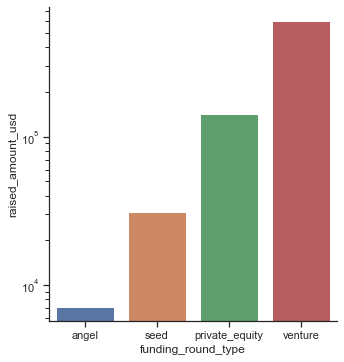

In [453]:
# Plotting the sum of investment against all the four funds
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="funding_round_type", y="raised_amount_usd", kind="bar", data=fundtype_master_frame)
plt.yscale("log")
plt.show()

***i.e most of the investements are happening in VENTURE funds***

In [454]:
# Without null - placeholder is median - analyzing the all the inevstment amount across al the four funds
master_frame.groupby(["funding_round_type"]).describe()

raised_amount_usd                                           \
                               count        mean          std  min        25%   
funding_round_type                                                              
angel                        6094.00  1169552.86   6625454.17 0.00  200000.00   
private_equity               2285.00 62417258.69 184146501.97 0.00 2000000.00   
seed                        30524.00  1010085.97   2025882.79 0.00  100000.00   
venture                     55494.00 10823840.72  82202445.65 0.00 2000000.00   

                                                           
                           50%         75%            max  
funding_round_type                                         
angel                600000.00  2000000.00   494511992.00  
private_equity     12122011.00 62400000.00  4745460219.00  
seed                 575000.00  2000000.00   200000000.00  
venture             4000000.00 10500000.00 17600000000.00

- If we analyze the above table then we can easily remove **seed** and **angel** fund as the investment amount for both the funds are less i.e less than 3rd qurtile investment are below 2 million USD.

- In the case of **private equity** investment amount are too high in different quartile ranges while comparing with **venture** funds. In all the quartiles venture funds are fulfilling the investment amount range criteria of **spark funds** and overall sum of investment is highest among all the funds. 

- Based on above analysis **VENTURE** is the most suitable for Spark Funds

In [455]:
# Filter all except venture as funding round type
master_frame = master_frame.loc[master_frame.funding_round_type=='venture']
master_frame.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,Media,operating,IND
1,/organization/-qounter,venture,14-10-2014,2000000.00,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
5,/organization/004-technologies,venture,24-07-2014,2000000.00,004 Technologies,Software,operating,USA


In [456]:
# Check rows and columns of dataframe
master_frame.shape

(55494, 8)

# 3. Country Analysis
- Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [457]:
# Top investment countries(Amounts are calculated in million USD)
top_countries=master_frame.groupby('country_code').sum('raised_amount_usd').reset_index()
#top_countries.raised_amount_usd=top_countries.raised_amount_usd.apply(lambda x: round(x/1000000,4))
top_countries.sort_values('raised_amount_usd', ascending=False).head(40)

,country_code,raised_amount_usd
100,USA,426976842796.00
16,CHN,40881418773.00
31,GBR,20741627416.00
41,IND,14727858718.00
13,CAN,9763332317.00
30,FRA,7395536732.00
44,ISR,7135514579.00
23,DEU,6802959822.00
47,JPN,3451676611.00
90,SWE,3316952563.00


In [458]:
# Get Venture funding round type and top coutries data only
top9 = master_frame[(master_frame.funding_round_type=='venture')&(master_frame.country_code.apply(lambda x : x if x in ['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','NGA'] else np.NaN))]

In [459]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43865 entries, 0 to 114936
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   43865 non-null  object 
 1   funding_round_type  43865 non-null  object 
 2   funded_at           43865 non-null  object 
 3   raised_amount_usd   43865 non-null  float64
 4   name                43865 non-null  object 
 5   category_list       43452 non-null  object 
 6   status              43865 non-null  object 
 7   country_code        43865 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.0+ MB


In [460]:
# sanity check - if all 9 countries are present or not
top9.country_code.value_counts()

USA    38372
GBR     2303
CAN     1346
IND      992
SGP      288
IRL      273
AUS      224
NZL       50
NGA       17
Name: country_code, dtype: int64

In [461]:
# Remove those rows which has null in country code
top9.dropna(subset=["country_code"], inplace=True)

In [462]:
# Sanity check of null
top9.country_code.isnull().sum()

0

In [463]:
# Check rows and columns of dataframe
top9.shape

(43865, 8)

In [464]:
# sanity check - if all 9 countries are present or not
top9.country_code.value_counts()

USA    38372
GBR     2303
CAN     1346
IND      992
SGP      288
IRL      273
AUS      224
NZL       50
NGA       17
Name: country_code, dtype: int64

In [465]:
# sanity check - if all funding type is present or not
top9.funding_round_type.value_counts()

venture    43865
Name: funding_round_type, dtype: int64

In [466]:
# sanity check - null in round type
top9.funding_round_type.isnull().sum()

0

In [467]:
# Country wise investment
top9_funding_country=top9.groupby('country_code').sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).round(2). reset_index()

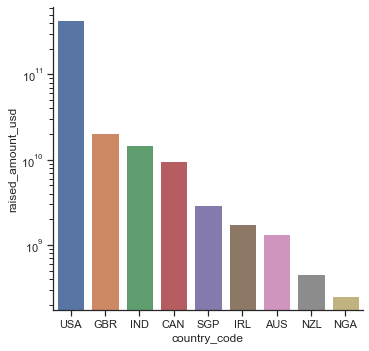

In [468]:
# Plotting the sum of investment against all the top 9 countries
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="country_code", y="raised_amount_usd", kind="bar", data=top9_funding_country)
plt.yscale("log")
plt.show()

In [469]:
top9_funding_country

,country_code,raised_amount_usd
0,USA,426976842796.00
1,GBR,20741627416.00
2,IND,14727858718.00
3,CAN,9763332317.00
4,SGP,2927917856.00
5,IRL,1778131350.00
6,AUS,1358934948.00
7,NZL,452316383.00
8,NGA,249440000.00


### Expected Result:
- Top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
  - These all are english speaking or accepted as official language in the country -
    ***USA,GBR,IND,CAN,SGP,IRL,AUS,NZL,NGA***
  - **Top English-speaking country** - USA
  - **Second English-speaking country** - GBR
  - **Third English-speaking country** - IND

In [470]:
# Check rows and columns of dataframe
top9.shape

(43865, 8)

# 4. Sector Analysis 1

In [471]:
# Load mapping data 
mapping=pd.read_csv(mappingFilePath, encoding="Palmos")

In [472]:
mapping.shape

(688, 10)

In [473]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [474]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
category_vars = list(mapping.columns[1:])

# take the setdiff() to get the rest of the variables
cat_type_vars = list(np.setdiff1d(mapping.columns, category_vars))
print(category_vars, "\n")
print(cat_type_vars)


['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [475]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [476]:
# Compacting DF to more readable 
mapping_readable_df = pd.melt(mapping, 
        id_vars = cat_type_vars,
        value_vars = category_vars)
mapping_readable_df

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [477]:
# remove rows having value=0
mapping_readable_df = mapping_readable_df[mapping_readable_df['value']==1]
mapping_readable_df = mapping_readable_df.drop('value', axis=1)

mapping_readable_df

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [478]:
# renaming the 'variable' column
mapping_df = mapping_readable_df.rename(columns={'variable': 'main_sector'})
mapping_df

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [479]:
# Drop null values 
mapping_df.dropna(subset=["category_list"], inplace=True)
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [480]:
# Data cleaning - typo error - replace zero(0) with 'na' --- e.g 'Perso0l' -- it should be 'Personal'
mapping_df.category_list = mapping_df.category_list.apply(lambda x : x.replace('0','na') if '0' in x else x)
mapping_df

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [481]:
# Take the 1st word as catogory list if it has '+' separator
mapping_df.category_list = mapping_df.category_list.apply(lambda x : x.split('|')[0] if '|' in x else x)
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [482]:
mapping_df.shape

(687, 2)

In [483]:
top9.shape

(43865, 8)

In [484]:
# Conversion of data type of category list into string
top9.category_list=top9.category_list.astype(str)

In [485]:
# Creating primary sector column in top9 dataframe from category_list
top9['primary_sector'] = top9.category_list.apply(lambda x : x.split('|')[0] if '|' in x else x)
top9.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,Media
1,/organization/-qounter,venture,14-10-2014,2000000.00,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms
5,/organization/004-technologies,venture,24-07-2014,2000000.00,004 Technologies,Software,operating,USA,Software
8,/organization/0ndine-biomedical-inc,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
10,/organization/0xdata,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,Analytics


In [486]:
# Map each primary sector to one of the eight main sectors in top9 DF with mapping DF

# Convert into same letter case
top9.primary_sector = top9.primary_sector.apply(lambda x: x.lower())
mapping_df.category_list = mapping_df.category_list.apply(lambda x: x.lower())

# Merge
top9_master=pd.merge(top9, mapping_df, left_on=["primary_sector"], right_on=["category_list"], how="left")
top9_master.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,media,Entertainment
1,/organization/-qounter,venture,14-10-2014,2000000.00,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,application platforms,"News, Search and Messaging"
2,/organization/004-technologies,venture,24-07-2014,2000000.00,004 Technologies,Software,operating,USA,software,software,Others
3,/organization/0ndine-biomedical-inc,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/0xdata,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [487]:
top9_master.main_sector.value_counts()

Others                                     10189
Cleantech / Semiconductors                  9283
Social, Finance, Analytics, Advertising     8990
News, Search and Messaging                  5304
Health                                      3705
Manufacturing                               2984
Entertainment                               2299
Automotive & Sports                          682
Name: main_sector, dtype: int64

In [488]:
top9_master.shape

(43865, 11)

# 5. Sector Analysis 2

- Here we will be analyzing the three countries - ***USA, GBR & IND***

In [489]:
# Top 3 countries data frame creation
D1 = top9_master[top9_master.country_code=='USA']
D2 = top9_master[top9_master.country_code=='GBR']
D3 = top9_master[top9_master.country_code=='IND']

***1. Total number of investment in each country:***

In [490]:
# Total number of investment in each 
D1_fund_count = D1.raised_amount_usd.count()
D2_fund_count = D2.raised_amount_usd.count()
D3_fund_count = D3.raised_amount_usd.count()
print("Total number of investment for D1 : ",D1_fund_count)
print("Total number of investment for D2 : ",D2_fund_count)
print("Total number of investment for D3 : ",D3_fund_count)

Total number of investment for D1 :  38372
Total number of investment for D2 :  2303
Total number of investment for D3 :  992


***2. Total investment in each country is :***

In [491]:
# Total amount of investment in each
D1_total_investment_amt = D1['raised_amount_usd'].sum()
D2_total_investment_amt = D2['raised_amount_usd'].sum()
D3_total_investment_amt = D3['raised_amount_usd'].sum()
print("Total amount of investment in D1 : ", D1_total_investment_amt)
print("Total amount of investment in D2 : ", D2_total_investment_amt)
print("Total amount of investment in D3 : ", D3_total_investment_amt)

Total amount of investment in D1 :  426976842796.0
Total amount of investment in D2 :  20741627416.0
Total amount of investment in D3 :  14727858718.0


***3. Top sector(number of investment wise) :***

In [492]:
# Number of investment wise top sector
print("Number of investment wise top sector in D1 : ", D1[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[0])
print("Number of investment wise top sector in D2 : ", D2[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[0])
print("Number of investment wise top sector in D3 : ", D3[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[0])

Number of investment wise top sector in D1 :  main_sector             Others
number_of_investment      8763
Name: 0, dtype: object
Number of investment wise top sector in D2 :  main_sector             Others
number_of_investment       580
Name: 0, dtype: object
Number of investment wise top sector in D3 :  main_sector             Others
number_of_investment       332
Name: 0, dtype: object


***4. 2nd top sector(number of investment wise) :***

In [493]:
# Number of investment wise 2nd sector
print("Number of investment wise 2nd sector in D1 : ", D1[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[1])
print("Number of investment wise 2nd sector in D2 : ", D2[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[1])
print("Number of investment wise 2nd sector in D3 : ", D3[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[1])

Number of investment wise 2nd sector in D1 :  main_sector             Cleantech / Semiconductors
number_of_investment                          8268
Name: 1, dtype: object
Number of investment wise 2nd sector in D2 :  main_sector             Social, Finance, Analytics, Advertising
number_of_investment                                        481
Name: 1, dtype: object
Number of investment wise 2nd sector in D3 :  main_sector             Social, Finance, Analytics, Advertising
number_of_investment                                        193
Name: 1, dtype: object


***5. 3rd top sector(number of investment wise) :***

In [494]:
# Number of investment wise 3rd sector
print("Number of investment wise 3rd sector in D1 : ", D1[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[2])
print("Number of investment wise 3rd sector in D2 : ", D2[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[2])
print("Number of investment wise 3rd sector in D3 : ", D3[['country_code','main_sector']].groupby("main_sector").count().rename(columns={'country_code': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index().iloc[2])

Number of investment wise 3rd sector in D1 :  main_sector             Social, Finance, Analytics, Advertising
number_of_investment                                       7822
Name: 2, dtype: object
Number of investment wise 3rd sector in D2 :  main_sector             Cleantech / Semiconductors
number_of_investment                           466
Name: 2, dtype: object
Number of investment wise 3rd sector in D3 :  main_sector             News, Search and Messaging
number_of_investment                           154
Name: 2, dtype: object


***6. Top company with highest investment amount:***

In [495]:
# Get Top main sector only 
D1_comp = D1[D1.main_sector=='Others'][["main_sector","company_permalink","raised_amount_usd"]]
D2_comp = D2[D2.main_sector=='Others'][["main_sector","company_permalink","raised_amount_usd"]]
D3_comp = D3[D3.main_sector=='Others'][["main_sector","company_permalink","raised_amount_usd"]]

# Top investment company in the top sector 
print("Top investment company in the top sector(Others) in D1(USA) : ",D1_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])
print("Top investment company in the top sector(Others) in D2(GBR) : ",D2_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])
print("Top investment company in the top sector(Others) in D3(IND) : ",D3_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])

Top investment company in the top sector(Others) in D1(USA) :  social-finance
Top investment company in the top sector(Others) in D2(GBR) :  oneweb
Top investment company in the top sector(Others) in D3(IND) :  flipkart


***7. 2nd top company with highest investment amount:***

In [496]:
# Get 2nd main sector only 
D1_comp = D1[D1.main_sector=='Cleantech / Semiconductors'][["main_sector","company_permalink","raised_amount_usd"]]
D2_comp = D2[D2.main_sector=='Social, Finance, Analytics, Advertising'][["main_sector","company_permalink","raised_amount_usd"]]
D3_comp = D3[D3.main_sector=='Social, Finance, Analytics, Advertising'][["main_sector","company_permalink","raised_amount_usd"]]

# Top investment company in the 2nd top sector 
print("Top investment company in the 2nd main sector(Others) in D1(USA) : ",D1_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])
print("Top investment company in the 2nd main sector(Others) in D2(GBR) : ",D2_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])
print("Top investment company in the 2nd main sector(Others) in D3(IND) : ",D3_comp[["main_sector","company_permalink","raised_amount_usd"]].groupby(["main_sector","company_permalink"]).sum('raised_amount_usd').sort_values('raised_amount_usd', ascending=False).reset_index().iloc[0]['company_permalink'].split('/')[2])

Top investment company in the 2nd main sector(Others) in D1(USA) :  freescale
Top investment company in the 2nd main sector(Others) in D2(GBR) :  powa-technologies
Top investment company in the 2nd main sector(Others) in D3(IND) :  shopclues-com


In [497]:
# Append all three countries data frame
D12=D1.append(D2, ignore_index=True)
top_countries = D12.append(D3,ignore_index=True)
top_countries.shape

(41667, 11)

### 6. Sector analysis plot 

##### 6.1 Representative amount plot

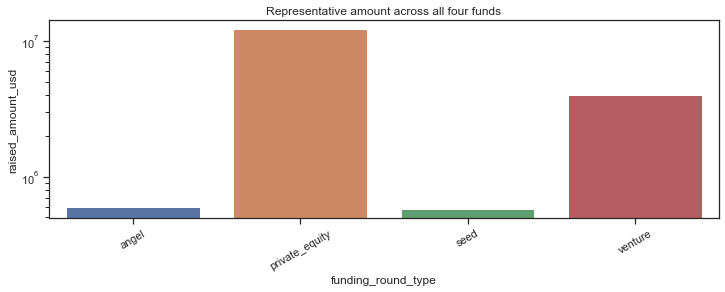

In [498]:
# Plot showing the representative amount of investment in each funding type
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
ax = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=median_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.yscale("log")
plt.title("Representative amount across all four funds")

plt.show()

##### 6.2 Sector and country wise investment and number of investment plot

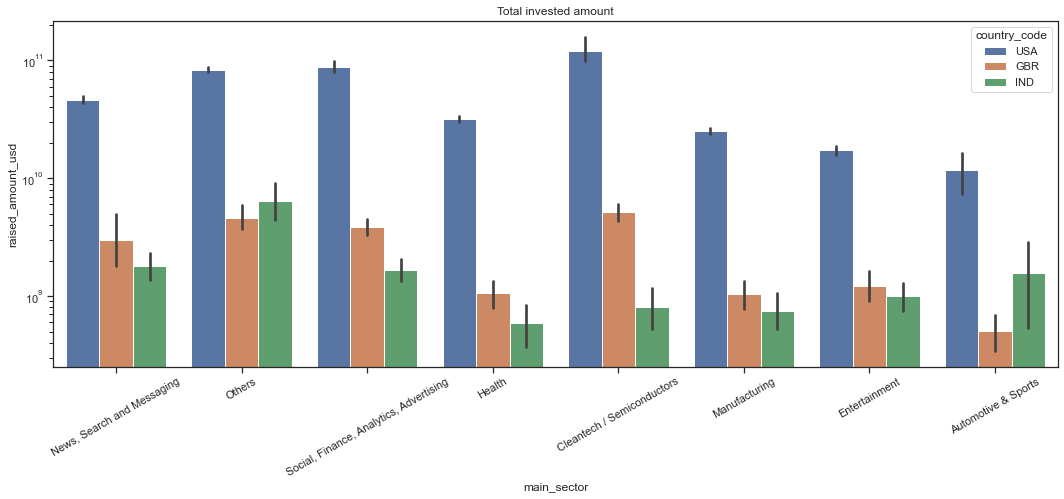

In [499]:
# Plotting sector wise  sum of investments in the top three countries
plt.figure(figsize=(18,14))

plt.subplot(2,1,1)
ax = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=top_countries, estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.yscale("log")
plt.title("Total invested amount")

plt.show()

In [500]:
# Coutry and sector wise number of investment
df = top_countries[['country_code','main_sector','funded_at']].groupby(["country_code","main_sector",]).count().rename(columns={'funded_at': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index()                

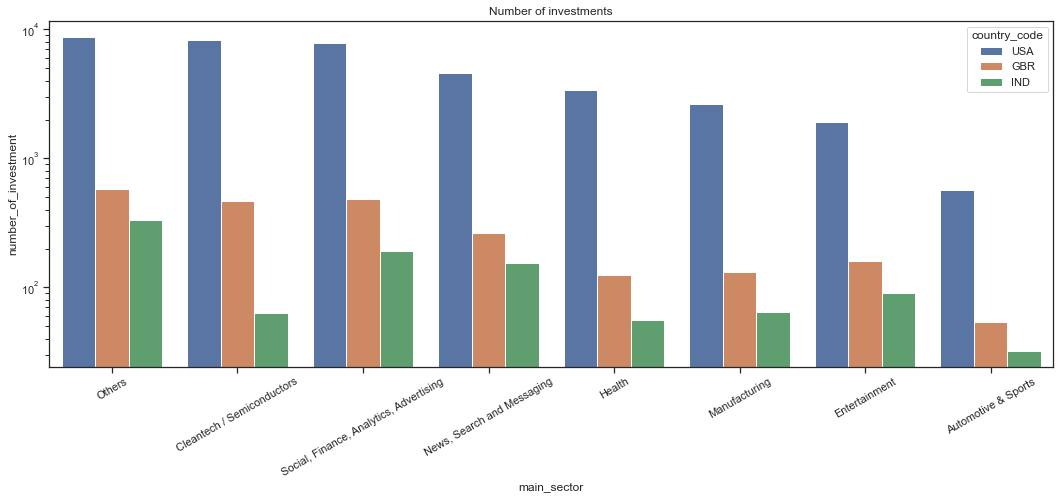

In [501]:
# Plotting sector wise count for all top 3 countries

plt.figure(figsize=(18,14))
plt.subplot(2,1,2)
bx = sns.barplot(x='main_sector', y='number_of_investment', hue="country_code", data=df)
bx.set_xticklabels(bx.get_xticklabels(),rotation=30)
plt.yscale("log")
plt.title("Number of investments")
plt.show()

##### 6.3 Top 3 sectors of the Top 3 countries plot 
 - Investment wise

In [502]:
# get the top 3 sectors DF of top 3 companies
top_countries.groupby(['main_sector']).sum("raised_amount_usd").sort_values('raised_amount_usd', ascending=False).reset_index()["main_sector"].iloc[:3]

0                 Cleantech / Semiconductors
1                                     Others
2    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

In [503]:
# get the top 3 sectors DF
top_countries_and_sectors=top_countries[((top_countries.main_sector=='Others')|(top_countries.main_sector=='Cleantech / Semiconductors')|(top_countries.main_sector=='Social, Finance, Analytics, Advertising'))]
top_countries_and_sectors.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
1,/organization/004-technologies,venture,24-07-2014,2000000.00,004 Technologies,Software,operating,USA,software,software,Others
2,/organization/0xdata,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
13,/organization/100plus,venture,02-11-2011,500000.00,100Plus,Analytics,acquired,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"


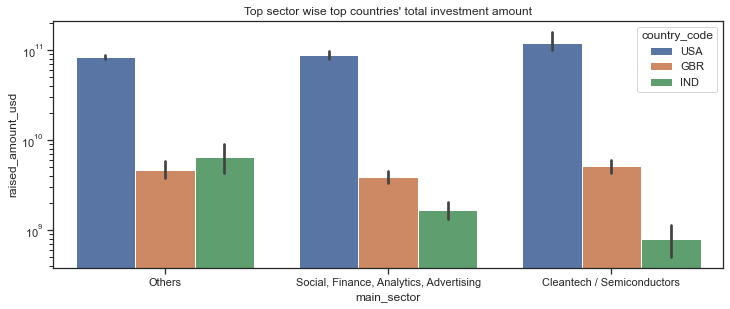

In [504]:
# Plotting sector wise  sum of investments in the top three countries' to sectors
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=top_countries_and_sectors, estimator=np.sum)
plt.yscale("log")
plt.title("Top sector wise top countries' total investment amount")

plt.show()

- Number of investment wise plot is shown below

In [505]:
# Coutry and sector wise number of investment
df_count = top_countries_and_sectors[['country_code','main_sector','funded_at']].groupby(["country_code","main_sector",]).count().rename(columns={'funded_at': 'number_of_investment'}).sort_values('number_of_investment', ascending=False).reset_index()                

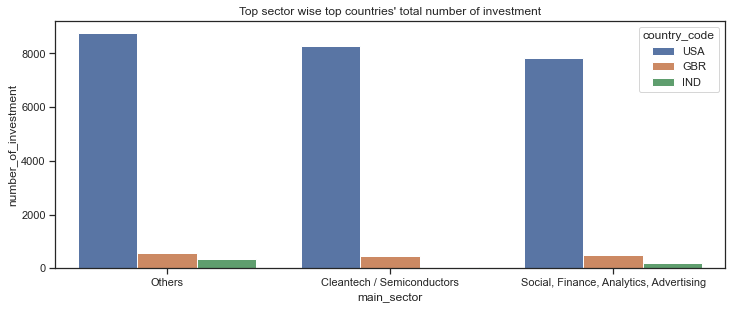

In [506]:
# Plotting sector wise count for all top 3 countries

plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
bx = sns.barplot(x='main_sector', y='number_of_investment', hue="country_code", data=df_count)
plt.title("Top sector wise top countries' total number of investment")
plt.show()

### Conclusion : 
On the basis of above analysis based on the the Spark fund's requirement
- Top investment country is ***USA***
- Top sector is ***Others***
- Top company is ***social-finance***

***//-------END--------//***